# Sploosh###

Abigail and Katie

In [68]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Question:
What is the shallowest pool an average adult male can dive into without hitting the bottom? 

<function matplotlib.pyplot.show(*args, **kw)>

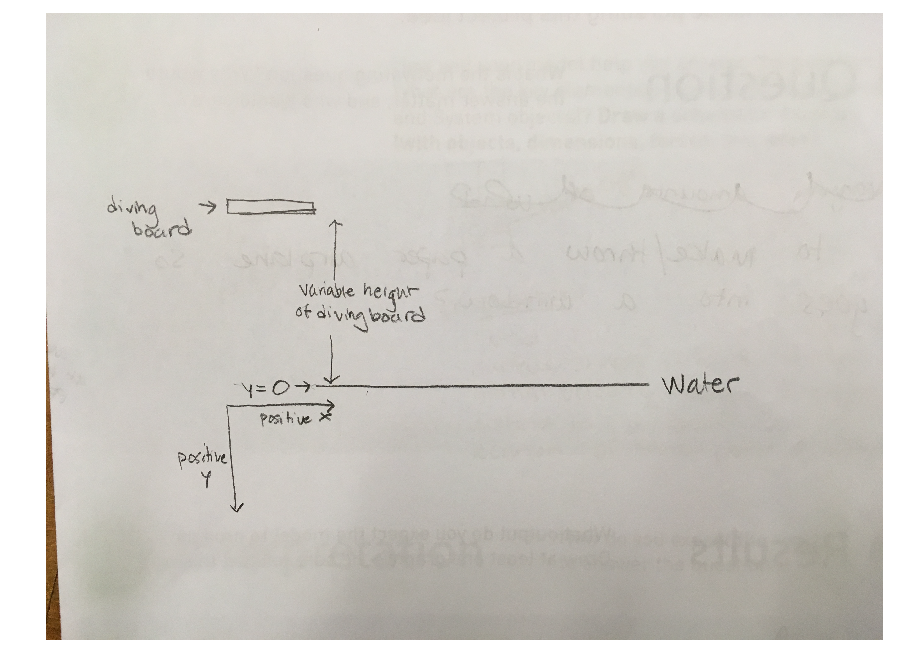

In [71]:
#inserts schematic
plt.figure(figsize = (15,15))
myImage = mpimg.imread("modsimproj3schem.png")
myImage = plt.imshow(myImage)
plt.axis('off')
plt.show

### Model: ##

Code:
To start modeling our question, we first needed to figure out what forces are acting on the person. While they're in the air, the main force acting on the person is gravity. While they're in the water, gravity still acts on them, but both bouyancy and drag become significant factors. To figure out which drag equation we needed to use, we calculated the reynold's number, which came out to 1.27. Since this is above 1, the best model for drag acting upwards on the person is the drag equation. 

Once we had modeled how the person will move through the water, we decided to add a component of how they move through the air in order to determine their velocity when they hit the water depending on the height of the dive. We followed the same process for this, and found a reynold's number of about 7, which is why we used the drag equation for this portion as well. 

In [2]:
init = Params(v=0,
          y= -.5,
        sub=0)

,values
v,0.0
y,-0.5
sub,0.0


In [3]:
M = UNITS.meter
KG = UNITS.kilogram
s = UNITS.second

init_system = System(g = 9.8*M/s**2,
               radius = .113*M,
               length = 1.8 * M,
               mass= 70*KG,
               Vol= .072*M**3,
                density_person = 985*KG/M**3,
               A= 3.14159*.113**2 *M**2, #reference area
                pw = 997* KG/M**3, #mass density of fluid (water)
                C = .82, #coefficient of drag, taken for a long cylinder in an article
                pa = 1.225*KG/M**3, #mass density of fluid (air)
                init = init,
                t_end = 30*s
               )

,values
g,9.8 meter / second ** 2
radius,0.113 meter
length,1.8 meter
mass,70 kilogram
Vol,0.072 meter ** 3
density_person,985.0 kilogram / meter ** 3
A,0.04011496271 meter ** 2
pw,997.0 kilogram / meter ** 3
C,0.82
pa,1.225 kilogram / meter ** 3


In order to make our model feasible and relatively accurate, we decided to simplify the shape of a human to be a long cylinder. The height and weight of the cylinder are the same as an average man. The density of the person is almost the same as water because the density of an average person is right around the same as water. From these dimensions we extrapolated the volume and thus the diameter of our "person". Although this is not the shape of a person, we decided that it would be too complicated to model an ac

In [4]:
def D_drag_force_air(system, state): #drag force in the air
    unpack(system)
    
    v, y, sub = state
    D_drag = .5*pa*v**2*C*A #drag equation
    
    return D_drag

In [5]:
def D_drag_force(system, state):  #drag force in the water
    unpack(system)
    
    v, y, sub = state
    D_drag = .5*pw*v**2*C*A  #drag equation
    
    return D_drag

In [6]:
def D_bouyancy_force(system, state): #bouyancy force
    
    v, y, sub = state
    unpack(system)
    D_bouyancy = pw*g*sub*Vol #bouyancy equation
    
    return D_bouyancy

In [11]:
def D_slope_func(state, t, system):
    unpack(system)
    v, y, sub = state
    
    if y >= 0: #water
        drag = D_drag_force(system, state)
        bouyancy = D_bouyancy_force(system, state)
        dvdt = g - drag/mass - bouyancy/mass
        dydt = v
        if sub > 1: #this is necessary because a person cannot be more than 100% submerged
            dsubdt = 0
        else:
             dsubdt = dydt/length #this is 
        
    if y < 0: #air
        
        dragA = D_drag_force_air(system, state)
        dvdt = g - dragA/mass
        dydt = v
        dsubdt = 0
    
    return dvdt, dydt, dsubdt

In [12]:
def event_func(state, t, system): 
    unpack(system)
    v, y, sub = state
        
    return y

In [13]:
event_func.direction = -1

We wanted our simulation to stop when the diver resurfaces after the dive, so we made our event function only work when y = 0 and is decreasing (because our reference frame has up as negative y). 

In [54]:
ys=-linspace(0,5,5)
results_sweep = {}
# print(results_sweep)

{}

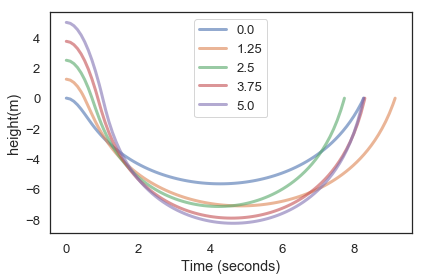

In [58]:
for y_0 in ys:
    system.init.y = y_0
    results, details = run_ode_solver(system, D_slope_func,events = event_func,max_step=0.1*s)
    results_sweep[y_0] = results
    
for y_0, results in results_sweep.items():
    plot(-results.y, label = -y_0) #we made y negative because our reference frame is upside-down, and we thought flipping it would make it easier to read
legend()
decorate(xlabel='Time (seconds)',
         ylabel='height(m)')

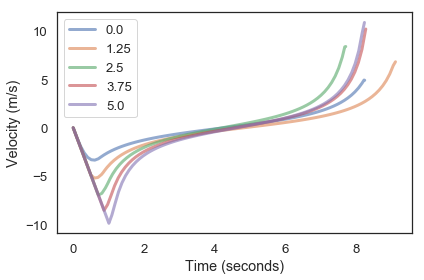

In [60]:
for y_0, results in results_sweep.items():
    plot(-results.v, label = -y_0)
legend()
decorate(xlabel='Time (seconds)',
         ylabel='Velocity (m/s)')

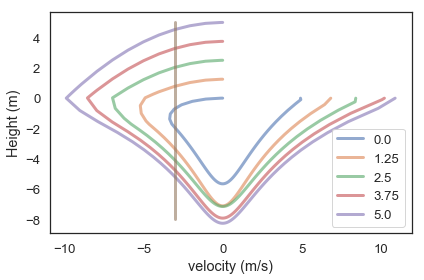

In [89]:
for y_0, results in results_sweep.items():
    plot(-results.v, -results.y, label = -y_0)

x_line = [-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5]
y_line = [-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3,-3] 
plot(y_line, x_line)
    
legend()
decorate(xlabel='velocity (m/s)',
         ylabel='Height (m)')

This is a graph of the height of the person as a function of their velocity. We decided that a safe velocity to reach at the bottom of the pool would be about 3 m/s. Following the vertical line down the graph gives you the height at which the diver reaches 3 m/s in the downward direction.

Interpretation:

Our model tells us that a safe pool depth to dive into from the side of the pool (0 meters) is about 2 meters and 6 meters for a 5 meter diving platform. We validated our results by checking them against the requirements for regulation pools. For a diving platform that is 5 meters above the water surface, the pool must be 4 meters deep. Since the person in our simulation dives straight down and has less drag than a typical human, our model is a bit more conservative than official estimates. To more accurately model how people dive, we would change the direction of the dive from perfectly perpendicular to the water to have an angle outwards, because people don't generally dive straight down. 